## Exercise for Graph IV
Your task:
Make the graph below! You will need to make use of 2 conditional edges!

![](image/condition_graph.png)

    - Input: initial_state = AgentState(number1 = 10, operation="-", number2 = 5, number3 = 7, number4=2, operation2="+", finalNumber = 0, finalNumber2 = 0)

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class conditionAgent(TypedDict):
    number1 : int
    operation : str
    number2 : int
    number3 : int
    number4 : int
    operation2 : str
    finalNumber : int
    finalNumber2 : int
    

In [3]:
def adder1(state: conditionAgent)-> conditionAgent:
    """This is the node add 2 numbers"""
    state["finalNumber"] = state['number1'] + state['number2']
    return state

def adder2(state: conditionAgent)-> conditionAgent:
    """This is the node add 2 numbers"""
    state["finalNumber2"] = state['number3'] + state['number4']
    return state

def subtractor1(state: conditionAgent)-> conditionAgent:
    """This is the node add 2 numbers"""
    state["finalNumber"] = state['number1'] - state['number2']
    return state

def subtractor2(state: conditionAgent)-> conditionAgent:
    """This is the node add 2 numbers"""
    state["finalNumber2"] = state['number3'] - state['number4']
    return state

def decide_next_node1(state: conditionAgent)->conditionAgent:
    if state['operation'] == "+":
        return "additional_operation1"
    elif state['operation'] == '-':
        return "subtraction_operation1"
    
def decide_next_node2(state: conditionAgent)->conditionAgent:
    if state['operation2'] == "+":
        return "additional_operation2"
    elif state['operation2'] == '-':
        return "subtraction_operation2"

In [4]:
graph = StateGraph(conditionAgent)

graph.add_node("add_node1", adder1)
graph.add_node("subtract_node1", subtractor1)
graph.add_node("router", lambda state:state) # passthrough function, the state will be input and the state will be the output as well

graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)
graph.add_node("router2", lambda state:state) 

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node1,
    {
        "additional_operation1" : "add_node1",
        "subtraction_operation1" : "subtract_node1"
    }
)
graph.add_edge("add_node1", "router2")
graph.add_edge("subtract_node1", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "additional_operation2" : "add_node2",
        "subtraction_operation2" : "subtract_node2"
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)
app = graph.compile()

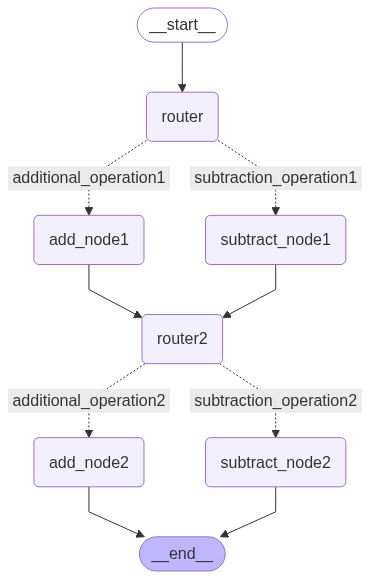

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
initial_state1 = conditionAgent(number1 = 10, operation="-", number2 = 5, number3 = 7, number4=2, operation2="+")
print(app.invoke(initial_state1))

{'number1': 10, 'operation': '-', 'number2': 5, 'number3': 7, 'number4': 2, 'operation2': '+', 'finalNumber': 5, 'finalNumber2': 9}
